In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
large = screen_funds('Equities', 'Domestic', 'Large-Cap')
mid = screen_funds('Equities', 'Domestic', 'Mid-Cap')
small = screen_funds('Equities', 'Domestic', 'Small-Cap')
print(len(large), len(mid), len(small))
quote = Quote(large + mid + small, 75, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

80 20 21
from 2019-04-24 to 2019-07-08 - 121


In [6]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats

90


,len,mean,std,shrp,drawdown
Symbols,,,,,
USMV,47,0.603352,1.493950,0.377301,2.180427
MTUM,47,0.708689,1.856711,0.360318,2.859384
SPLV,47,0.579571,1.515472,0.356251,2.660443
PDP,47,0.526273,2.125432,0.228937,3.974186
FVD,47,0.353556,1.511105,0.207711,3.793309
VIG,47,0.401629,1.769300,0.204571,4.634193
FPX,47,0.457344,2.116572,0.197329,5.445800
ADX,47,0.387523,1.819025,0.191223,5.318352
FTCS,47,0.344328,1.872894,0.162660,5.011633


evicted USA 0.8703974078372594
evicted XSLV 0.7331046675769656
retry backlogs ['HDV', 'MDYG', 'VTI', 'VXF', 'ONEQ', 'FEX', 'SCHB', 'QUAL', 'VONG', 'DGRO', 'SPTM', 'SPYV', 'IWV', 'IWB', 'VTV', 'VYM', 'SCHX', 'IWP', 'PRF', 'ITOT', 'IVW', 'SPYG', 'VONV', 'XMLV', 'VUG', 'VOOG', 'TILT', 'SPLG', 'IVE', 'IVV', 'SCHG', 'IWY', 'OEF', 'GSLC', 'MGC', 'SPY', 'MGV', 'IWR', 'RSP', 'SDY', 'IUSG', 'SCHV', 'VOO', 'VV', 'DLN', 'IWF', 'RPG', 'IWS', 'VO', 'FNDX', 'SPHQ', 'IJK', 'SUSA', 'FVD', 'DGRW', 'IYY', 'DIA', 'DSI', 'SPHD', 'DVY', 'IWD', 'FTCS', 'MGK', 'JKE', 'VONE', 'FV', 'IUSV', 'FPX', 'VIG', 'SPLV', 'SPYD', 'SCHM', 'FDL', 'LRGF', 'PKW', 'SCHD', 'VOT', 'JHMM', 'PDP', 'NOBL', 'VOE', 'USMV', 'QQQ', 'VBK', 'ADX', 'SDOG', 'PWV'] at 0.905 - 0.3603180624762881
evicted VBK 0.888091357317508
evicted FDL 0.8625872901755623
retry backlogs ['IYY', 'DGRW', 'SPTM', 'DGRO', 'VTI', 'HDV', 'IWP', 'SPHD', 'VXF', 'VV', 'OEF', 'VONG', 'SCHB', 'SPYV', 'VOE', 'ITOT', 'SPLG', 'GSLC', 'SPHQ', 'IVW', 'VOO', 'RSP', 'IWB', 

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
USMV,47.0,0.603352,1.49395,-1.764315,-0.507887,0.454034,1.439816,4.297077,0.377301,2.180427
Portfolio,47.0,0.603352,1.49395,-1.764315,-0.507887,0.454034,1.439816,4.297077,0.377301,2.180427


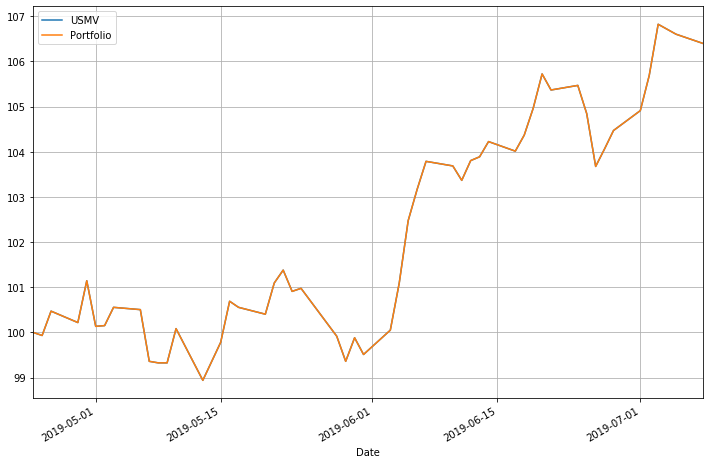

In [7]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.1)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)

In [5]:
Quote(screen_funds('Equities', 'Domestic', 'Preferred'), 75, 5).statistics()

,len,mean,std,shrp,drawdown
Symbols,,,,,
PGX,47,0.207992,0.296214,0.568204,0.582894
FPE,47,0.243186,0.380190,0.535269,0.570249
VRP,47,0.207244,0.334920,0.500304,0.657068
PFF,47,0.212323,0.421587,0.409502,0.754922
PGF,47,0.186089,0.409155,0.357826,0.876261
